In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("D:\\excler\\Assignment\\Neural Networks\\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [2]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [3]:
data.corr()["NOX"]

AT     -0.600006
AP      0.256744
AH      0.143061
AFDP   -0.037299
GTEP   -0.208496
TIT    -0.231636
TAT     0.009888
TEY    -0.102631
CDP    -0.169103
CO      0.316743
NOX     1.000000
Name: NOX, dtype: float64

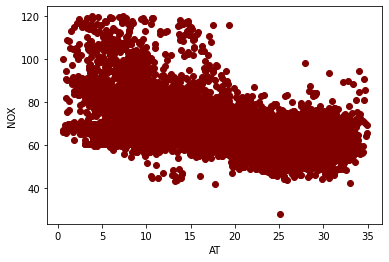

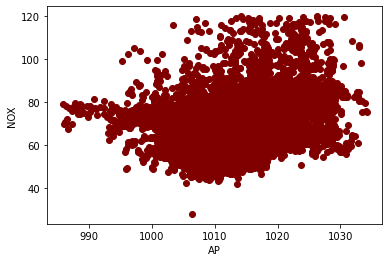

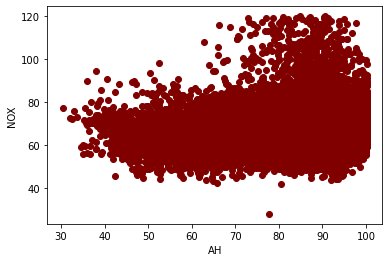

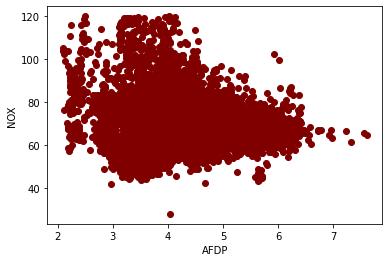

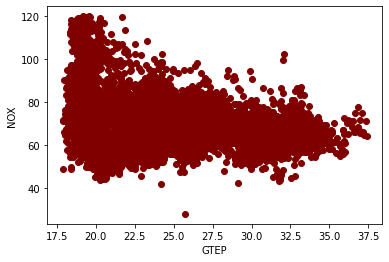

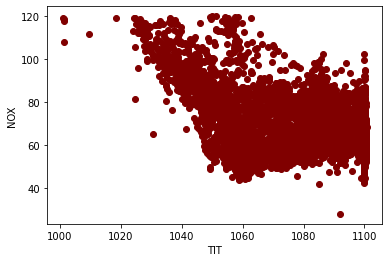

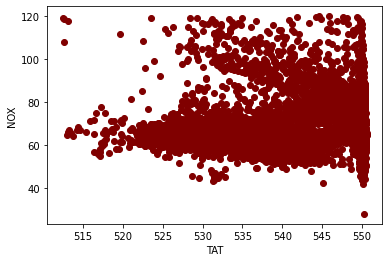

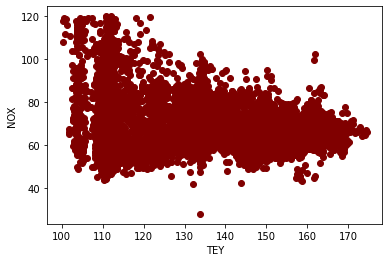

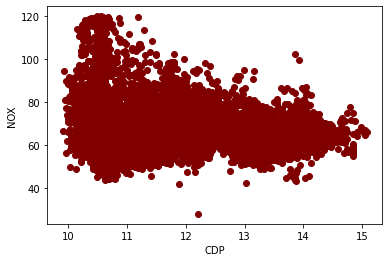

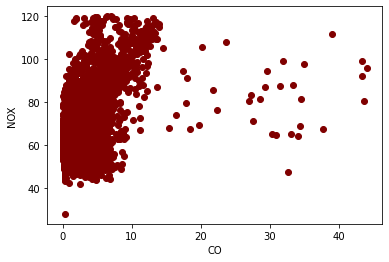

In [4]:
for col in data.columns[:len(data.columns)-1]:
    plt.scatter(data[col], data["NOX"], color="maroon")
    plt.ylabel("NOX")
    plt.xlabel(col)
    plt.show()

In [5]:
X = np.random.permutation(data.index)
data = data.reindex(X)

In [6]:
A = int(len(data)*0.8)

test = data[:A]
train = data[A:]

In [7]:
cols = data.columns.drop("NOX")

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(train[cols], train["NOX"])

predictions_train = reg.predict(train[cols])

rmse = (np.mean((predictions_train - train["NOX"])**2))**0.5
rmse

6.44530220981044

In [8]:
predictions_test = reg.predict(test[cols])

rmse = (np.mean((predictions_test - test["NOX"])**2))**0.5
rmse

6.597279226937498

In [9]:
predictions_test

array([64.72339513, 64.66049776, 73.82890158, ..., 67.65435027,
       67.30282749, 78.48663357])

In [10]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[cols], train["NOX"])

predictions_DT = reg.predict(test[cols])

rmse_DT = (np.mean(predictions_DT - test["NOX"])**2)**0.5
rmse_DT

0.12349850386501547

In [11]:
predictions_DT

array([60.386     , 64.996     , 77.4315    , ..., 64.31066667,
       66.903     , 74.5535    ])